<a href="https://colab.research.google.com/github/kachmaryk/computer_vision/blob/main/lab2/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

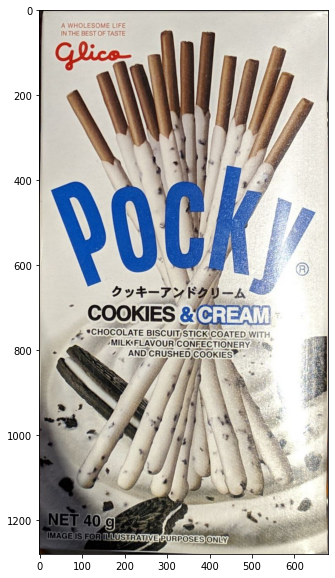

In [27]:
img_1 = cv2.imread('img_1.jpg')

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

In [28]:
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY) # queryImage

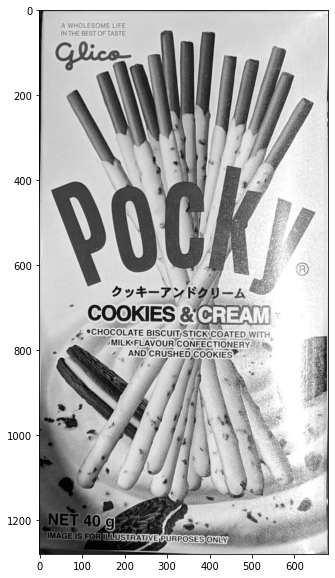

In [29]:
plt.figure(figsize=(10,10))
plt.imshow(img_1, cmap='gray')

In [49]:
orb = cv2.ORB_create()
kp_1, des_1 = orb.detectAndCompute(img_1, None)
img_1_key_points = cv2.drawKeypoints(img_1, kp_1, des_1)

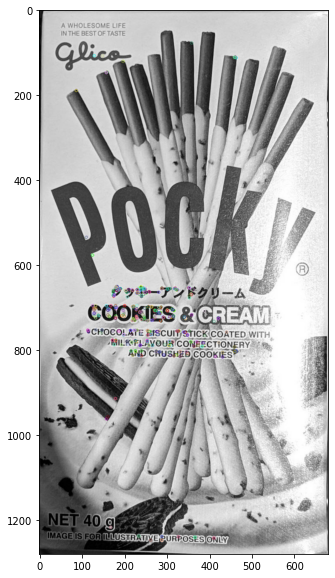

In [50]:
plt.figure(figsize=(10,10))
plt.imshow(img_1_key_points)

In [42]:
des_1

array([[ 55,  57,  99, ..., 167, 119, 214],
       [ 38, 105,  16, ...,  30, 125, 142],
       [147, 236,  43, ...,  59,  48, 244],
       ...,
       [191, 236, 103, ..., 191, 114, 208],
       [ 38,  44, 208, ...,  73,  67, 128],
       [ 56, 215, 115, ...,  26, 228, 123]], dtype=uint8)

In [107]:
print(kp_1)

[<KeyPoint 0x7f1f466bb270>, <KeyPoint 0x7f1f463c4f60>, <KeyPoint 0x7f1f463c4990>, <KeyPoint 0x7f1f463c4450>, <KeyPoint 0x7f1f463c4a50>, <KeyPoint 0x7f1f463c4720>, <KeyPoint 0x7f1f463c4660>, <KeyPoint 0x7f1f463c4540>, <KeyPoint 0x7f1f463c4300>, <KeyPoint 0x7f1f463c4e40>, <KeyPoint 0x7f1f463c4f30>, <KeyPoint 0x7f1f463c4c90>, <KeyPoint 0x7f1f463c4bd0>, <KeyPoint 0x7f1f463c4780>, <KeyPoint 0x7f1f463c47b0>, <KeyPoint 0x7f1f463c4d20>, <KeyPoint 0x7f1f463c4a20>, <KeyPoint 0x7f1f463c4870>, <KeyPoint 0x7f1f463c46c0>, <KeyPoint 0x7f1f463c45d0>, <KeyPoint 0x7f1f463c4db0>, <KeyPoint 0x7f1f463c48d0>, <KeyPoint 0x7f1f463c4c00>, <KeyPoint 0x7f1f463c47e0>, <KeyPoint 0x7f1f463c4ae0>, <KeyPoint 0x7f1f463c4f00>, <KeyPoint 0x7f1f463c42d0>, <KeyPoint 0x7f1f463c4b10>, <KeyPoint 0x7f1f463c42a0>, <KeyPoint 0x7f1f463c4750>, <KeyPoint 0x7f1f463c4840>, <KeyPoint 0x7f1f463c49c0>, <KeyPoint 0x7f1f463c4e10>, <KeyPoint 0x7f1f463c4ea0>, <KeyPoint 0x7f1f463c4e70>, <KeyPoint 0x7f1f463c4c60>, <KeyPoint 0x7f1f463c4900>, 

In [43]:
des_1.shape

(500, 32)

In [40]:
len(kp_1)

500

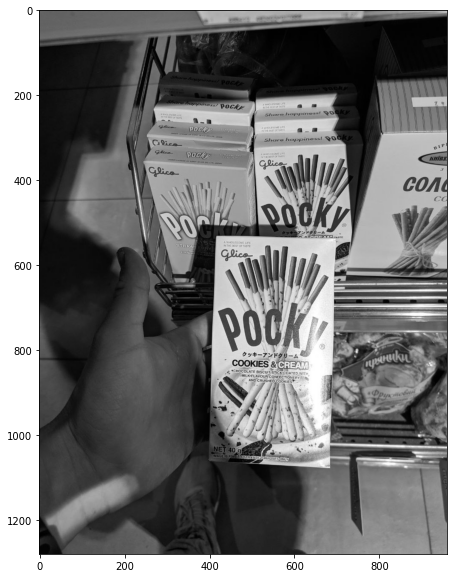

In [48]:
scene = cv2.imread('img_2.jpg', cv2.IMREAD_GRAYSCALE) # queryImage

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(scene, cv2.COLOR_BGR2RGB))

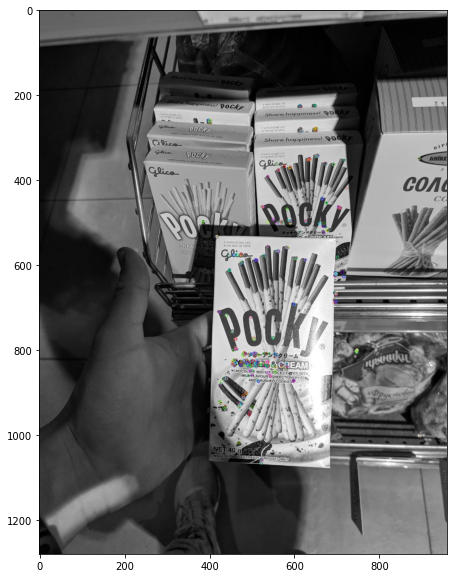

In [51]:
orb = cv2.ORB_create()
kp_2, des_2 = orb.detectAndCompute(scene, None)
scene_key_points = cv2.drawKeypoints(scene, kp_2, des_2)

plt.figure(figsize=(10,10))
plt.imshow(scene_key_points)

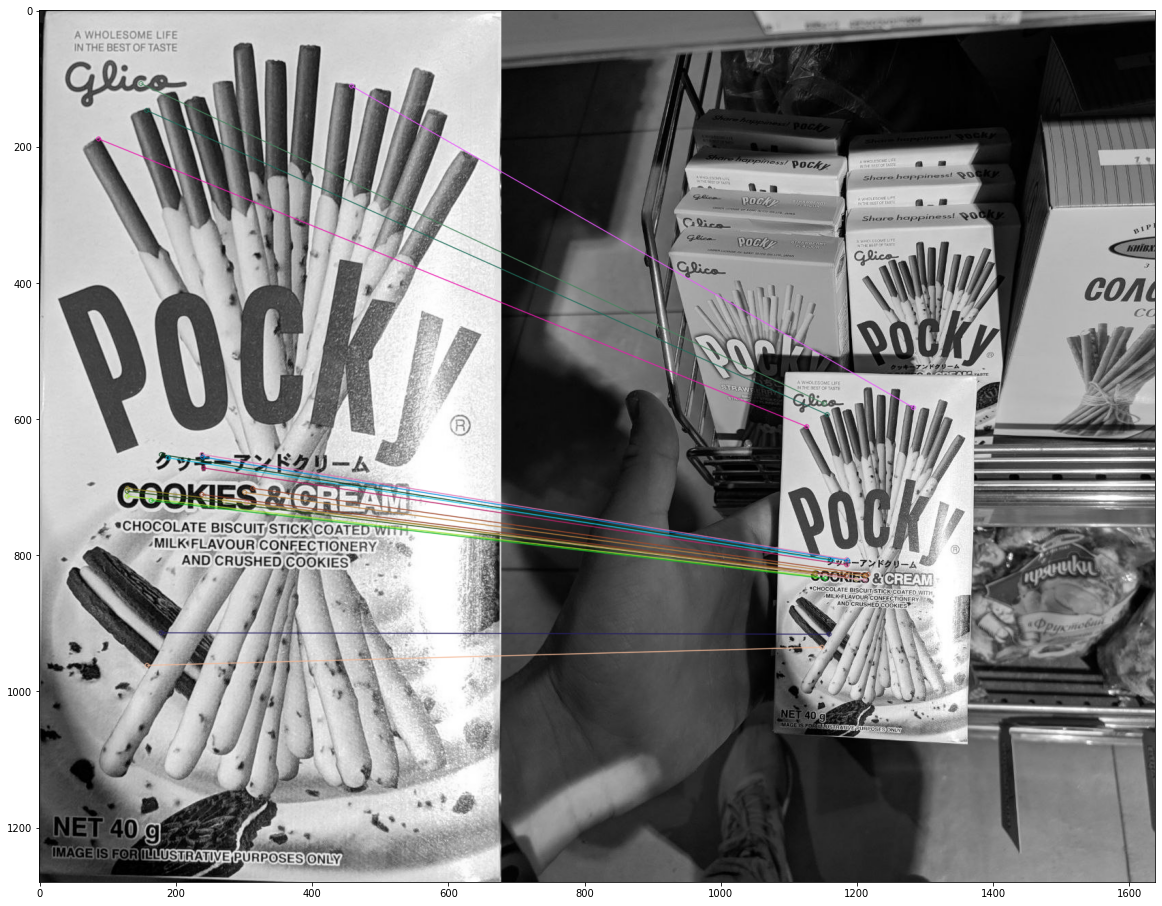

In [92]:
# create BFMatcher object 
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors. 
matches = bf.match(des_1, des_2) 

# Sort them in the order of their distance. 
matches = sorted(matches, key = lambda x:x.distance) 

# Draw first 10 matches. 
res = cv2.drawMatches(img_1, kp_1,
                      scene, kp_2,
                      matches[:20], None,
                      flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS) 

plt.figure(figsize=(20,20))
plt.imshow(res) 
plt.show()

In [56]:
len(matches)

168

In [60]:
matches[0].trainIdx, matches[0].queryIdx, matches[0].imgIdx, matches[0].distance

(205, 482, 0, 9.0)

In [64]:
print(des_1.shape)
des_1[0]

(500, 32)


array([ 55,  57,  99, 128, 247, 214, 251,  66,  41, 196,  88, 175,   8,
       140, 119,   0, 254, 235, 147, 213, 148, 155, 180, 238,  58,  28,
       143, 226, 239, 167, 119, 214], dtype=uint8)

In [69]:
print(des_2.shape)
des_2[0]

(500, 32)


array([135, 226, 110, 179, 100, 137, 233, 200, 206,  28, 117,  19, 133,
       201, 127,  13, 170,   9,  19, 127, 226, 116,  14, 245,  68, 216,
       219, 109,  92, 137,  81, 128], dtype=uint8)

In [70]:
from scipy.spatial.distance import hamming

In [74]:
hamming(des_1[0], des_2[0]) * len(des_1[0])

32.0

In [108]:
np.sum(des_1[0] != des_2[0])

32

In [100]:
matches_own = []
for i, k_1 in enumerate(des_1):
  min_distance = np.inf
  train_idx = 0

  for j, k_2 in enumerate(des_2):
    distance = hamming_dist(k_1, k_2)

    if min_distance > distance:
      min_distance = distance
      train_idx = j
    
  matches_own.append(cv2.DMatch(_distance=min_distance,
                                _imgIdx=0, _queryIdx=i, _trainIdx=train_idx))

len(matches_own)

500

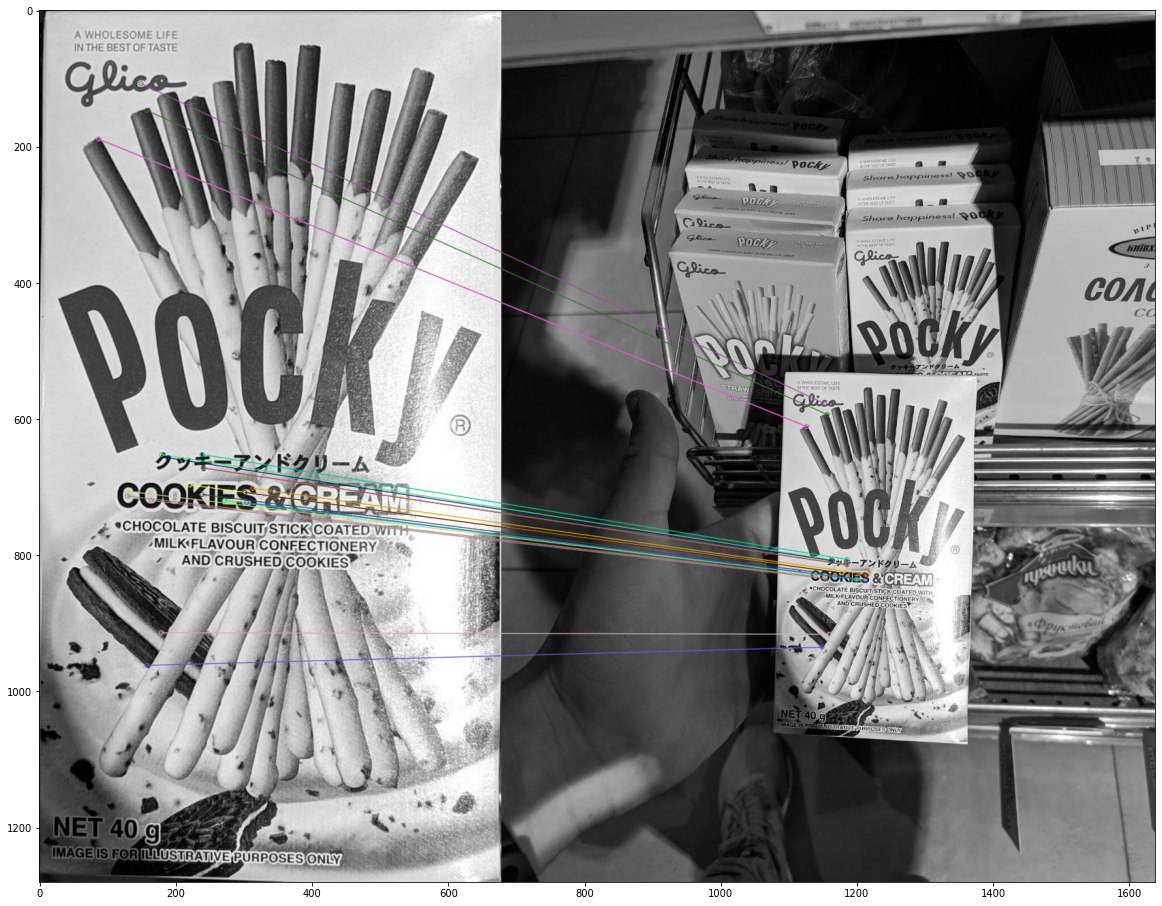

In [96]:
matches_own = sorted(matches_own, key = lambda x:x.distance) 

res_own = cv2.drawMatches(img_1, kp_1,
                          scene, kp_2,
                          matches_own[:20], None,
                          flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS) 

plt.figure(figsize=(20,20))
plt.imshow(res_own) 
plt.show()